In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno

In [588]:
dfs = []
directory = os.path.join("c:\\","/Users/Mo/Documents/Valkyrie_assesment")
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            df_i = pd.read_csv(f'{file}')
            dfs.append(df_i)

studentAssessment.csv
studentInfo.csv
studentVle.csv
courses.csv
vle.csv
studentRegistration.csv
assessments.csv


### General Workflow:
- EDA
    - DATA CHECKS
    - DATA EXPLORATION
    - MERGING DATASETS

- DATA SCHEMA
    - Questions that can be answered
    
- IMPLEMENTATION
- LAYERING DATA


In [589]:
df_stud_asses = dfs[0]
df_stud_info = dfs[1]
df_stud_vle = dfs[2]
df_courses = dfs[3]
df_vle = dfs[4]
df_stud_reg = dfs[5]
df_assesments = dfs[6]

In [590]:
print(df_stud_asses.shape)
print(df_stud_vle.shape)
print(df_stud_reg.shape)

(173912, 5)
(10655280, 6)
(32593, 5)


#### Student Performance

In [681]:
print(df_stud_asses.shape)
print(df_stud_asses.isnull().sum())

(173912, 5)
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [682]:
df_stud_asses.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


- Inspecting Null values

<AxesSubplot:xlabel='score', ylabel='Count'>

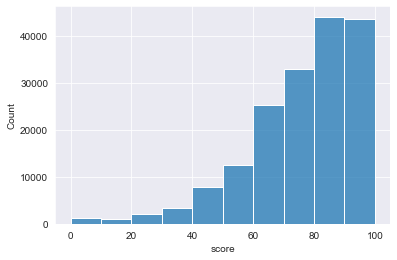

In [683]:
# checking if null values are due to Failing grades (< 40)
sns.histplot(df_stud_asses, x = 'score', bins = 10)

In [690]:
# get all rows with null values = df_stud_asses[df_stud_asses['score'].isnull()].index.tolist()
asses_nulls = df_stud_asses.iloc[x].sort_values(by=['date_submitted'])
asses_nulls

,id_assessment,id_student,date_submitted,is_banked,score
65848,25334,555297,-2,0,NaN
16612,14997,501208,-1,1,NaN
3943,14984,534151,7,0,NaN
28957,15008,606501,11,0,NaN
104174,34860,174436,13,0,NaN
...,...,...,...,...,...
148556,34902,489553,241,0,NaN
148929,34903,582670,241,0,NaN
107629,34863,2054019,258,0,NaN
43498,15022,1723749,270,0,NaN


count    173.000000
mean     128.803468
std       75.036554
min       -2.000000
25%       54.000000
50%      129.000000
75%      203.000000
max      274.000000
Name: date_submitted, dtype: float64

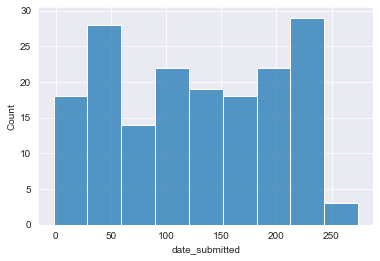

In [689]:
# checking if there is something about submission date
sns.histplot(asses_nulls, x = 'date_submitted')
perf_nulls.date_submitted.describe()

In [692]:
df_stud_asses.id_assessment = df_stud_asses.id_assessment.astype(str)
assess_nulls_dist = asses_nulls.id_assessment.unique()
print('IDs w/ null values: ',len(asses_nulls.id_assessment.unique()))
print('All IDs: ', len(df_stud_asses.id_assessment.unique()))

IDs w/ null values:  78
All IDs:  188


In [696]:
# Here we are keeping only rows the from original dataset that have Assessment IDs that are associated with null values
# If there is something to do with these assesments then we should expect a dataframe with a significant amount of
# null values for the score

x2_list
#df_stud_asses.id_assessment.unique()

checklist = []
for id in assess_nulls_dist:
    df = df_stud_asses[df_stud_asses.id_assessment == id]
    checklist.append(df)
check = pd.concat(checklist)

In [697]:
check

,id_assessment,id_student,date_submitted,is_banked,score
65121,25334,40419,25,0,76.0
65122,25334,41060,24,0,85.0
65123,25334,43284,23,0,79.0
65124,25334,45664,25,0,66.0
65125,25334,52014,23,0,81.0
...,...,...,...,...,...
103873,30722,652902,165,0,95.0
103874,30722,652971,166,0,91.0
103875,30722,653210,165,0,95.0
103876,30722,653248,166,0,61.0


Looks like it doesnt really have to do with assessment ID. What about something to do with students?

In [700]:
asses_stud = asses_nulls.id_student.unique()

checklist = []
for id in asses_stud:
    df2 = df_stud_asses[df_stud_asses.id_student == id]
    checklist.append(df2)
check2 = pd.concat(checklist)
check2

,id_assessment,id_student,date_submitted,is_banked,score
65848,25334,555297,-2,0,NaN
14829,14996,501208,-1,1,40.0
16612,14997,501208,-1,1,NaN
18757,14998,501208,-1,1,43.0
19238,14999,501208,139,0,42.0
...,...,...,...,...,...
45851,15024,1723749,223,0,45.0
100897,30719,691701,33,0,88.0
102124,30720,691701,68,0,71.0
103057,30721,691701,131,0,50.0


In [704]:
# proportion of null values for selected students
check2.score.isnull().sum() / check2.shape[0] 

0.15418894830659535

- Nothing about students either.. 15% of targeted student pool have null values for at least one of their scores

#### Conclusion: One possible cause for the null values could be perhaps an assessment that was either dropped or was an incomplete assignment.

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64


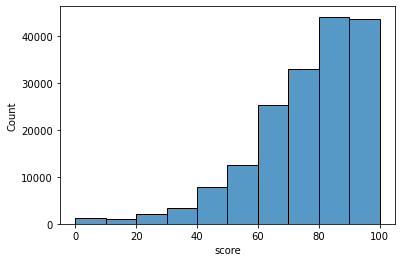

In [186]:
sns.histplot(df_stud_asses, x = 'score', bins = 10)
print(df_stud_asses.score.describe())

- Since there is low variance in the data (std dev/mean <1 ) AND missing values make up < 0.01% of the data, we can just replace the missing values with the mean

In [214]:
mean = df_stud_asses.score.mean()
df_stud_asses.score = df_stud_asses.score.fillna(value=mean)

- Student VLE Data

In [12]:
df_stud_vle.head()
print(df_stud_vle.shape)
print(df_stud_vle.isnull().sum())

(10655280, 6)
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


- Student Registration Data

In [13]:
print(df_stud_reg.shape)
print(df_stud_reg.isnull().sum())

(32593, 5)
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


- date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).

- date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.

In [708]:
# Proportion of students that completed their course
df_stud_reg.date_unregistration.isnull().sum() / df_stud_reg.shape[0]

0.6909765900653515

- Null values in date unregistered column indicates that 69% of students completed the course and 31% did not
- *Hypothesis:* Maybe null values for *date_registration* have to do with some modules or presentations that got cancelled

In [229]:
df_stud_reg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [710]:
# Getting all data points with null values for date_registration
pres_test = df_stud_reg[df_stud_reg['date_registration'].isnull()].index.tolist()
pres_test2 = df_stud_reg.iloc[y].sort_values(by=['date_registration'])
pres_test2.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0


In [727]:
# Presentation
pres_test2.code_presentation.value_counts()

2014B    18
2013J    10
2014J     9
2013B     8
Name: code_presentation, dtype: int64

In [719]:
# Presentation control
df_stud_reg.code_presentation.value_counts()

2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64

- Counts is too low on the null dataset to be able to say anything

In [728]:
# module
pres_test2.code_module.value_counts()

DDD    15
FFF    11
BBB     9
CCC     8
EEE     2
Name: code_module, dtype: int64

In [729]:
# module control
df_stud_reg.code_module.value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

- No noticeable patterns when considering presentation/modules

count    32548.000000
mean       -69.411300
std         49.260522
min       -322.000000
25%       -100.000000
50%        -57.000000
75%        -29.000000
max        167.000000
Name: date_registration, dtype: float64


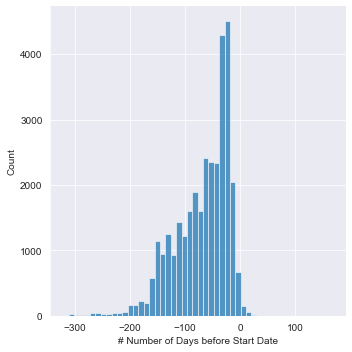

In [731]:
# Distribution of people 
sns.displot(df_stud_reg, x="date_registration",bins = 50)
plt.xlabel("# Number of Days before Start Date")
print(df_stud_reg.date_registration.describe())

- Most people signed up about 70 days before the course started

##### Merging performance datasets

In [241]:
# removing redundant columns 
df_stud_reg = df_stud_reg.drop(columns = ['code_module','code_presentation'])

In [ ]:
print(df_stud_reg)
print(df_stud_asses)
print(df_stud_vle)

In [242]:
df_performance = df_stud_asses.merge(df_stud_reg, on = 'id_student', how = 'left').merge(df_stud_reg, on = 'id_student', how = 'left')

In [709]:
df_performance.head(20)

# Usefule when wanting to find insights or predictions based on activity/assessment type

,code_module,code_presentation,module_presentation_length,id_site,activity_type,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,546943,resource,1752,TMA,19.0,10.0
1,AAA,2013J,268,546943,resource,1753,TMA,54.0,20.0
2,AAA,2013J,268,546943,resource,1754,TMA,117.0,20.0
3,AAA,2013J,268,546943,resource,1755,TMA,166.0,20.0
4,AAA,2013J,268,546943,resource,1756,TMA,215.0,30.0
5,AAA,2013J,268,546943,resource,1757,Exam,NaN,100.0
6,AAA,2013J,268,546712,oucontent,1752,TMA,19.0,10.0
7,AAA,2013J,268,546712,oucontent,1753,TMA,54.0,20.0
8,AAA,2013J,268,546712,oucontent,1754,TMA,117.0,20.0
9,AAA,2013J,268,546712,oucontent,1755,TMA,166.0,20.0


In [680]:
df_performance.shape

(65147, 9)

#### Module Data

In [245]:
print('Courses:')
print(df_courses.shape)
print(df_courses.isnull().sum())
print('Assements:')
print(df_assesments.shape)
print(df_assesments.isnull().sum())
print('VLE:')
print(df_vle.shape)
print(df_vle.isnull().sum())

Courses:
(22, 3)
code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
Assements:
(206, 6)
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
VLE:
(6364, 6)
id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


- Assesment dataset has 11 null values for 'date' column

- date denotes the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).

**Assessment Data**

In [251]:
df_assesments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [253]:
# get all rows with null values
asses_null = df_assesments[df_assesments['date'].isnull()].index.tolist()
asses_null = df_assesments.iloc[asses_null].sort_values(by=['code_module'])
asses_null

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


- Looks like when assessments are Exams they have null value for the date
- This kinda makes sense since it could be the case that there was no need to have an exam due date since everyone would take it at the same time.

In [263]:
df_assesments[df_assesments.assessment_type == 'Exam']

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


- It seems my hypothesis is not correct since there are some exam with due dates.
- Some reasons for this is could be that either 
    - 1) Some module presentations do not have exams (especially the early modules)
    - 2) Some exams do not have a set due date
    - 3) Early exams were cancelled (Can check later to see if students actually took these exams by looking at assesment_ids
    - 3) There could be different types of exams where early exams tend to be all taken at the same time (hence no due date) and the later exams have a more flexible due date where they can be completed at anytime as long as it is before the due date/

We can leave them as null values since the implication is not clear.

**VLE Data**

In [732]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [733]:
# get all rows with null values
vle_null = df_vle[~df_vle['week_from'].isnull()].index.tolist()
vle_null = df_vle.iloc[vle_null].sort_values(by=['id_site'])
vle_null

,id_site,code_module,code_presentation,activity_type,week_from,week_to
4500,526755,FFF,2013B,oucontent,1.0,1.0
4325,526756,FFF,2013B,oucontent,1.0,1.0
4504,526788,FFF,2013B,oucontent,2.0,2.0
4337,526838,FFF,2013B,oucontent,2.0,2.0
4147,526845,FFF,2013B,oucontent,3.0,3.0
...,...,...,...,...,...,...
1483,913669,BBB,2014J,resource,2.0,2.0
1471,913676,BBB,2014J,resource,9.0,9.0
1529,913681,BBB,2014J,resource,9.0,9.0
1562,913740,BBB,2014J,url,3.0,3.0


In [735]:
# get all rows with null values for week_from
vle_null2 = df_vle[df_vle['week_from'].isnull()].index.tolist()
vle_null2 = df_vle.iloc[vle_null2].sort_values(by=['id_site'])
vle_null2

,id_site,code_module,code_presentation,activity_type,week_from,week_to
4435,526721,FFF,2013B,homepage,NaN,NaN
4260,526733,FFF,2013B,forumng,NaN,NaN
4086,526735,FFF,2013B,forumng,NaN,NaN
4419,526737,FFF,2013B,forumng,NaN,NaN
4244,526738,FFF,2013B,forumng,NaN,NaN
...,...,...,...,...,...,...
1781,1072252,CCC,2014J,forumng,NaN,NaN
1927,1072253,CCC,2014J,oucollaborate,NaN,NaN
4003,1073191,EEE,2014J,resource,NaN,NaN
3964,1076553,EEE,2014J,oucontent,NaN,NaN


- #### Null values Benchmark

Orange = # of Non-Null values
Blue = Total # of ALL values

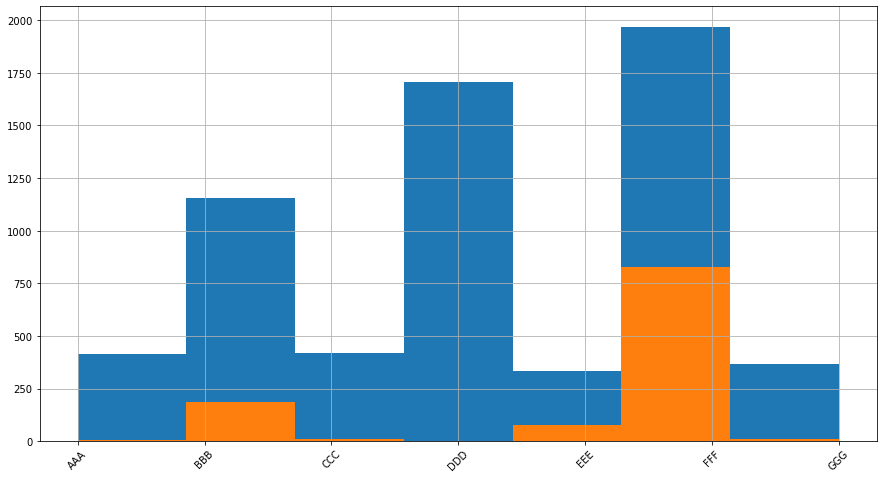

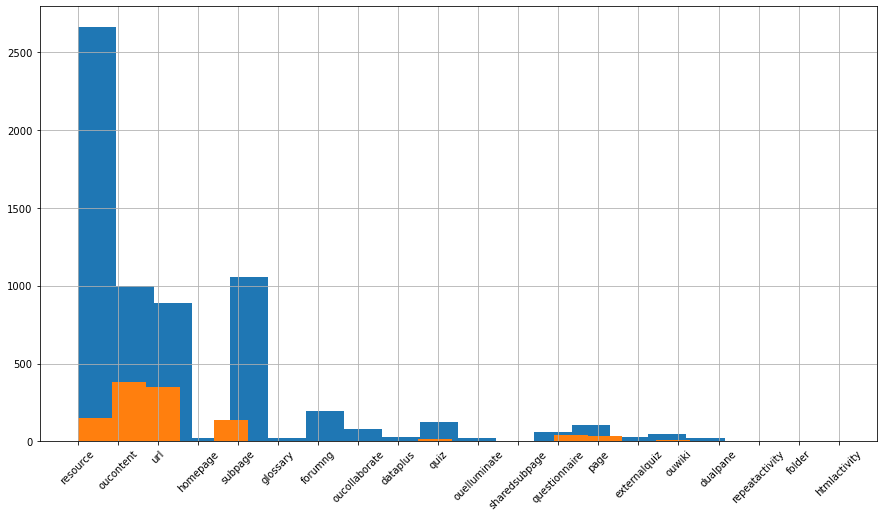

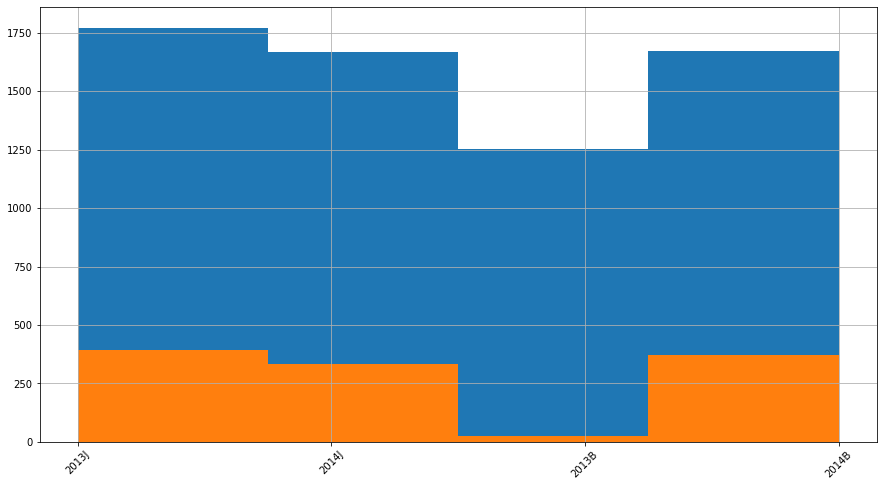

In [370]:
df_vle.code_module.hist(figsize = [15,8], xrot = 45, bins = len(df_vle.code_module.unique()))
vle_null.code_module.hist(figsize = [15,8], xrot = 45, bins = len(df_vle.code_module.unique()))
plt.show()

df_vle.activity_type.hist(figsize = [15,8], xrot = 45, bins = len(df_vle.activity_type.unique()))
vle_null.activity_type.hist(figsize = [15,8], bins = len(df_vle.activity_type.unique()))
plt.show()

# vle_null.activity_type.hist(figsize = [15,8], bins = len(df_vle.activity_type.unique()))
# plt.show()

df_vle.code_presentation.hist(figsize = [15,8], xrot = 45,  bins = len(df_vle.code_presentation.unique()))
vle_null.code_presentation.hist(figsize = [15,8], bins = len(df_vle.code_presentation.unique()))
plt.show()

- Not alot of interesting patterns here. Most of the non-null value distribution across different features seem to be relatively proportional to the total count number of each value within each feature.
    - **Only thing** worth noting is that non-null values tend to be mostly concentrated with FFF modules
    - 'Outcontent' and 'URL' assessment types have a relatively high number of non-null values when benchmarked.
        - Could be that they are more associated with FFF modules?

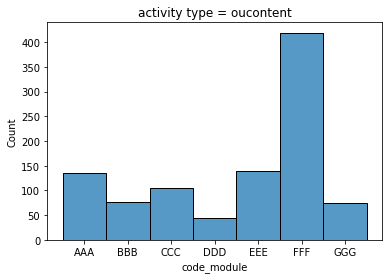

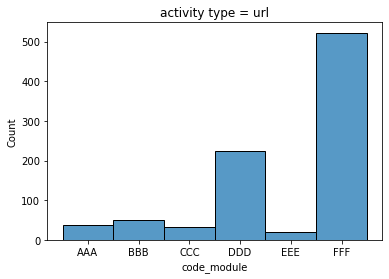

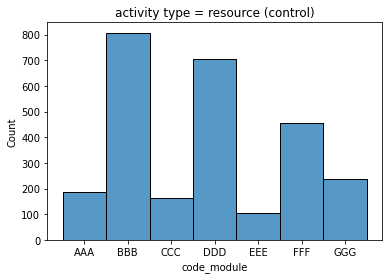

In [384]:
oucontent = df_vle[df_vle.activity_type == 'oucontent']
url = df_vle[df_vle.activity_type == 'url']
sns.histplot(oucontent, x = 'code_module').set(title='activity type = oucontent')
plt.show()
sns.histplot(url, x = 'code_module').set(title='activity type = url')
plt.show()

resource = df_vle[df_vle.activity_type == 'resource']
sns.histplot(resource, x = 'code_module').set(title='activity type = resource (control)')
plt.show()


- Looks like my suspicion was correct; 'url' and 'oucontent' have higher non-null values because they are more associated with FFF modules

- Verdict: it is not super clear why most week_to/from values are NaN, perhaps it is has something to do with the type of activty type where only certain types of activities are planned but it is not likely since those activities have mostly NaN values as well
    - Another reason could be just clerical laziness where whoever implemented these modules and activities only planned them out whenever they felt like it.
    - Either way these week_to/from features will not be of much use when it comes to influencing any future predictions or insights 

In [406]:
df_vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


In [407]:
df_vle = df_vle.drop(columns = ['week_from','week_to'])

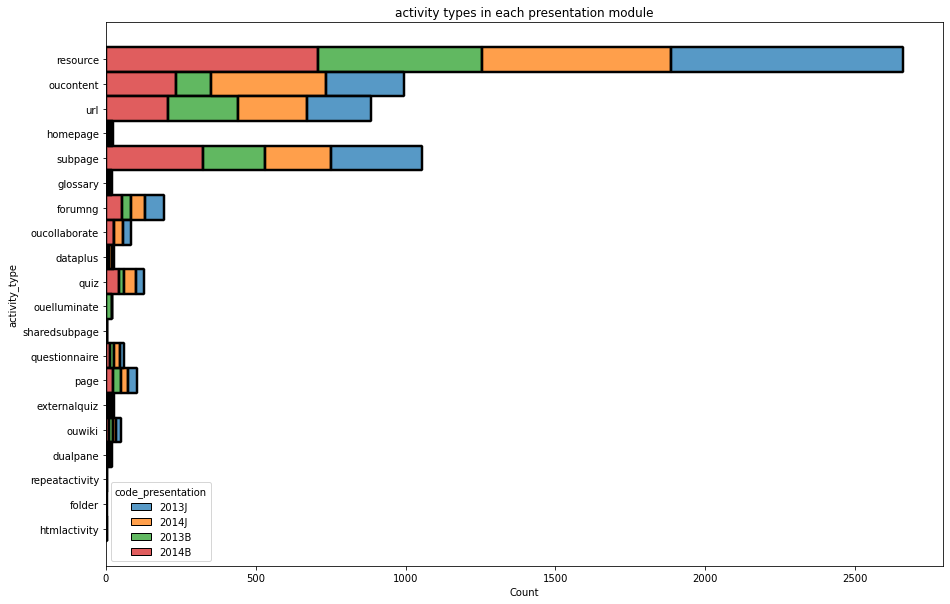

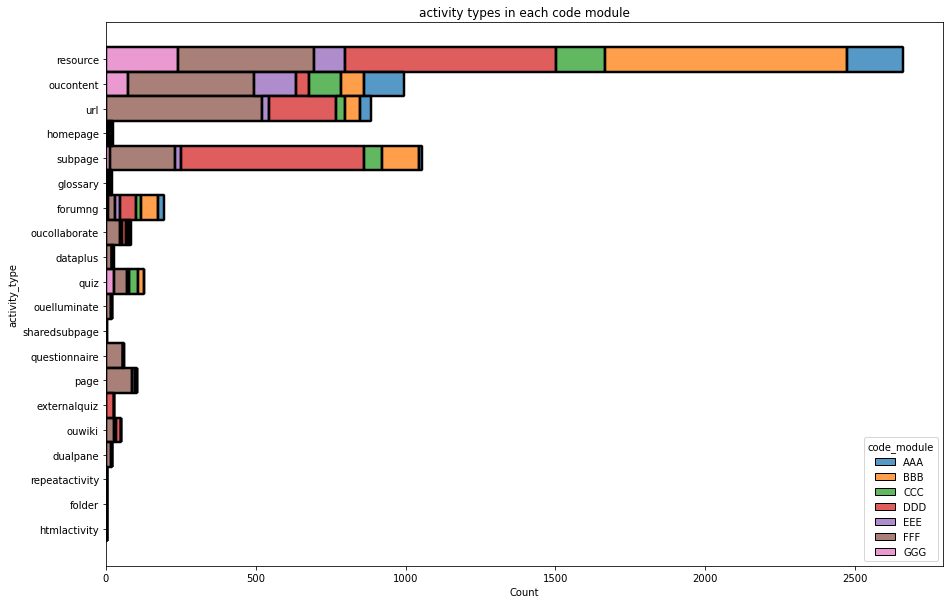

In [408]:
plt.figure(figsize = [15,10])
sns.histplot(df_vle, y = 'activity_type', hue = 'code_presentation', multiple = 'stack').set(title='activity types in each presentation module')
plt.show()
plt.figure(figsize = [15,10])
sns.histplot(df_vle, y = 'activity_type', hue = 'code_module', multiple = 'stack').set(title='activity types in each code module')
plt.show()


- Plot 1: The amouont of each activity type is pretty equal across the different presentation modules
- Plot 2: The amount of a specific activity type will vary greatly depending on what code module you are on

In [38]:
df_vle = df_vle.drop(columns = ['week_from','week_to'])

In [413]:
df_courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


- No null values and the only useful info this dataset will have is giving us the length of each code_presentations for each respective module.

#### Merging Module datasets
- Courses --> Assesments --> VLE

In [414]:
df_assesments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [426]:
df_vle_dict = pd.merge(df_courses, df_vle, on = ['code_module','code_presentation'], how='left')

In [427]:
df_asses_dict = pd.merge(df_courses, df_assesments, on = ['code_module','code_presentation'], how='left')

In [428]:
df_vle_dict

,code_module,code_presentation,module_presentation_length,id_site,activity_type
0,AAA,2013J,268,546943,resource
1,AAA,2013J,268,546712,oucontent
2,AAA,2013J,268,546998,resource
3,AAA,2013J,268,546888,url
4,AAA,2013J,268,547035,resource
...,...,...,...,...,...
6359,GGG,2014B,241,798802,resource
6360,GGG,2014B,241,798620,forumng
6361,GGG,2014B,241,798688,oucontent
6362,GGG,2014B,241,798760,resource


- This dataset provides as a dictionary for knowing activty type with id_site is associated with which modules

### Student Info

In [591]:
print(df_stud_info.shape)
print(df_stud_info.isnull().sum())

(32593, 12)
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


- code_module – an identification code for a module on which the student is registered.
- code_presentation - the identification code of the presentation during which the student is registered on the module.
- id_student – a unique identification number for the student.
- gender – the student’s gender.
- region – identifies the geographic region, where the student lived while taking the module-presentation.
- highest_education – highest student education level on entry to the module presentation.
- imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation. (proxy for socioeconomic )
- age_band – band of the student’s age.
- num_of_prev_attempts – the number times the student has attempted this module.
- studied_credits – the total number of credits for the modules the student is currently studying.
- disability – indicates whether the student has declared a disability.
- final_result – student’s final result in the module-presentation.

In [459]:
df_stud_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [592]:
# get all rows with imd_band null values
stud_null = df_stud_info[df_stud_info['imd_band'].isnull()].index.tolist()
stud_null_info = df_stud_info.iloc[stud_null].sort_values(by=['id_student'])
stud_null_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
20417,EEE,2014B,29639,M,North Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
10600,CCC,2014J,29639,M,North Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
22302,FFF,2013B,37298,M,Ireland,HE Qualification,NaN,0-35,0,120,N,Pass
8661,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass
22304,FFF,2013B,43011,M,North Region,Lower Than A Level,NaN,0-35,2,60,N,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...
19356,DDD,2014J,2680988,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Fail
26187,FFF,2013J,2687989,M,Ireland,A Level or Equivalent,NaN,0-35,0,60,N,Pass
10590,CCC,2014B,2692327,M,North Region,A Level or Equivalent,NaN,35-55,0,60,N,Distinction
17555,DDD,2014B,2692948,F,Ireland,Lower Than A Level,NaN,35-55,1,120,N,Pass


- Does the data include duplicate students? If so, for demographic analysis we will want to get rid of the duplicates so as to not skew the data.

In [626]:
# check duplicate ID's
duplicates= df_stud_info.loc[df_stud_info.duplicated(subset=['id_student']) == True]
duplicates.head()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
395,AAA,2014J,65002,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,1,60,N,Fail
403,AAA,2014J,94961,M,South Region,Lower Than A Level,70-80%,35-55,1,60,N,Pass
415,AAA,2014J,129955,M,West Midlands Region,A Level or Equivalent,50-60%,0-35,1,60,N,Withdrawn
422,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn
423,AAA,2014J,135400,F,South East Region,Lower Than A Level,90-100%,35-55,1,60,Y,Pass


In [648]:
# checking different ID's to see what the different instances mean

#df_stud_info[df_stud_info.id_student == 533512]
df_stud_info[df_stud_info.id_student == 1993672]


# Duplicates seem to infer students that either re-took the modules OR that have taken more than one module
# Incomplete record of students

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
2376,BBB,2013B,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,3,60,Y,Withdrawn
4592,BBB,2013J,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,4,60,Y,Withdrawn
8521,BBB,2014J,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,5,60,Y,Fail


## *Big inconsistency in this data is that it seems to be incomplete*
- For some students that have a high number of retries for certain modules, it does not show the record of ALL of their previous tries. It only shows some.

#### Benchmark Null Values
- Index of Multiple Deprevation is calculated using the following features:
    - Income. (22.5%)
    - Employment. (22.5%)
    - Education. (13.5%)
    - Health. (13.5%)
    - Crime. (9.3%)
    - Barriers to Housing and Services. (9.3%)
    - Living Environment. (9.3%)
  
- Possible factors in our data:
    - Region
    - Education
    - Age (Proxy for Health) *could also be proxy for income but I am assuming that younger people are still living with parents
    - Disability (Proxy for Barrier to housing/services)
    - (Possible layering data --> crime/region)

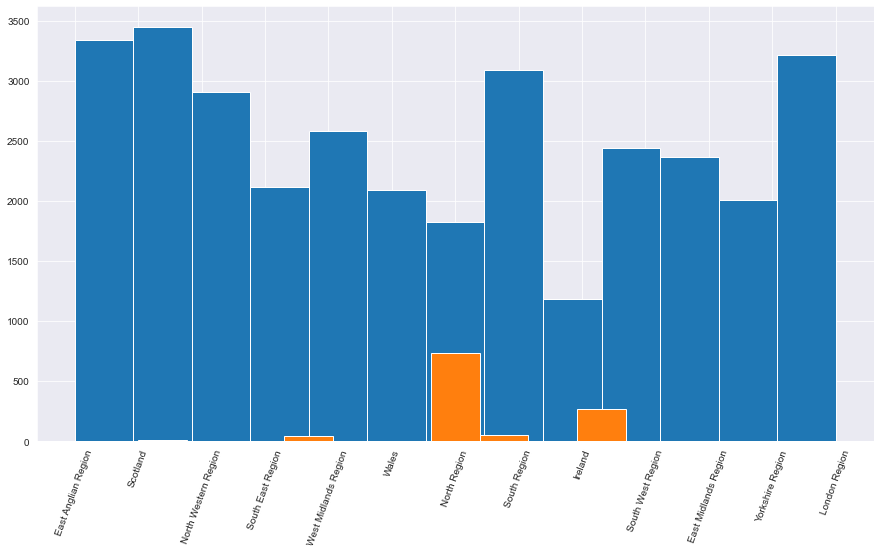

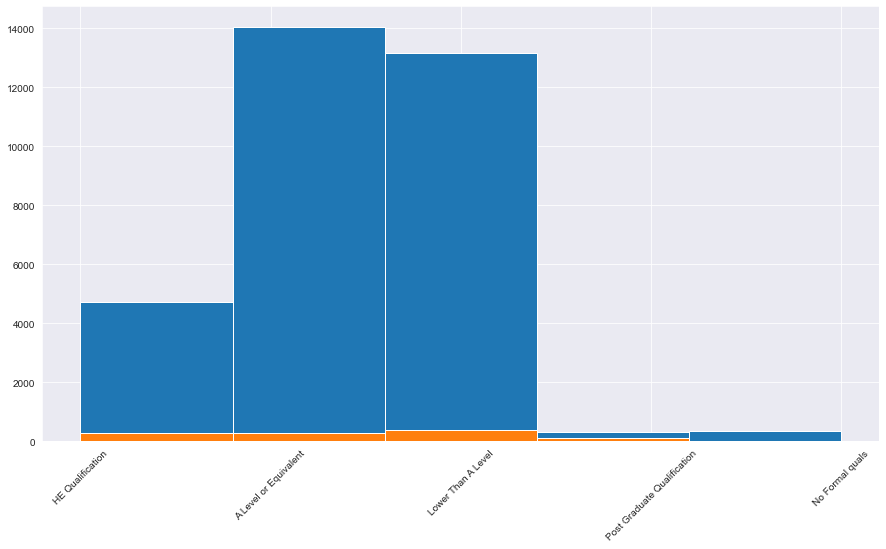

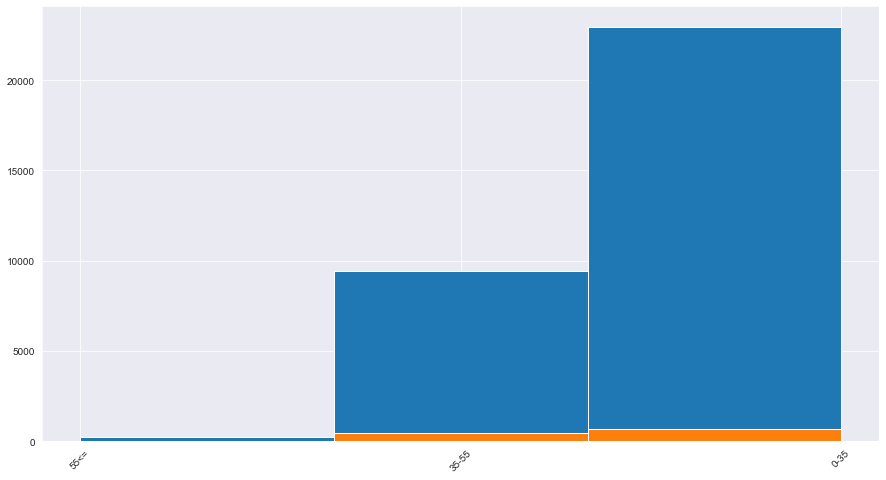

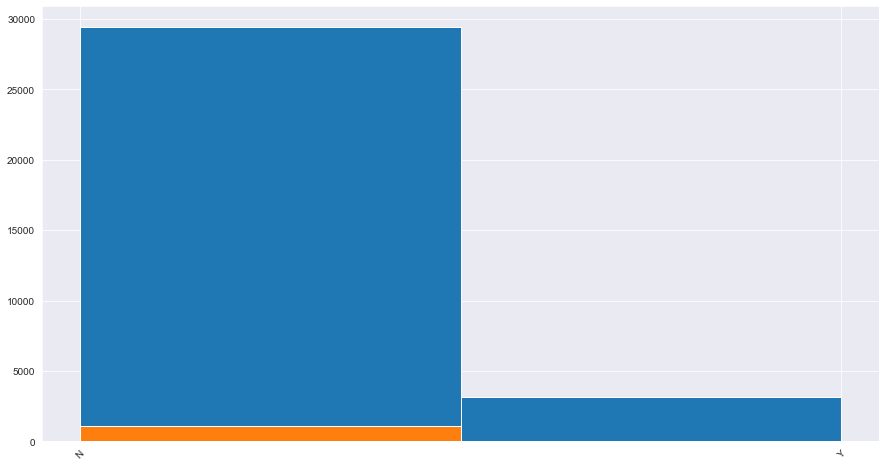

In [597]:
df_stud_info.region.hist(figsize = [15,8], xrot = 70, bins = len(df_stud_info.region.unique()))
stud_null_info.region.hist(figsize = [15,8], xrot = 70, bins = len(df_stud_info.region.unique()))
plt.show()

df_stud_info.highest_education.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.highest_education.unique()))
stud_null_info.highest_education.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.highest_education.unique()))
plt.show()

df_stud_info.age_band.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.age_band.unique()))
stud_null_info.age_band.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.age_band.unique()))
plt.show()

df_stud_info.disability.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.disability.unique()))
stud_null_info.disability.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.disability.unique()))
plt.show()

- Looks like 'North Region' & 'Ireland' have higher null values relative to their absolute volume.
- Not definitive but could be a reasonable explanation

--------------
#### Demographic Analysis

In [650]:
### New dataframe without duplicated for demographic analysis ####
df_demographic = df_stud_info.drop_duplicates(subset = 'id_student')

# check null values in new data
df_demographic.isnull().sum()
# still have a few

code_module               0
code_presentation         0
id_student                0
gender                    0
region                    0
highest_education         0
imd_band                971
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
dtype: int64

In [656]:
# get all rows with imd_band null values
df_demographic.code_module = df_demographic.code_module.astype(str)
demo_null = df_demographic[df_demographic['imd_band'].isnull()].index.tolist()
demo_null_info = df_demographic.loc[demo_null].sort_values(by=['id_student'])
demo_null_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
10600,CCC,2014J,29639,M,North Region,Lower Than A Level,NaN,0-35,0,30,N,Pass
22302,FFF,2013B,37298,M,Ireland,HE Qualification,NaN,0-35,0,120,N,Pass
8661,CCC,2014B,40604,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass
22304,FFF,2013B,43011,M,North Region,Lower Than A Level,NaN,0-35,2,60,N,Withdrawn
10609,CCC,2014J,46705,M,Ireland,HE Qualification,NaN,35-55,0,60,N,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...
19356,DDD,2014J,2680988,F,North Region,Post Graduate Qualification,NaN,35-55,0,60,N,Fail
26187,FFF,2013J,2687989,M,Ireland,A Level or Equivalent,NaN,0-35,0,60,N,Pass
10590,CCC,2014B,2692327,M,North Region,A Level or Equivalent,NaN,35-55,0,60,N,Distinction
17555,DDD,2014B,2692948,F,Ireland,Lower Than A Level,NaN,35-55,1,120,N,Pass


- Double checking for any null-values patterns **without duplicates**

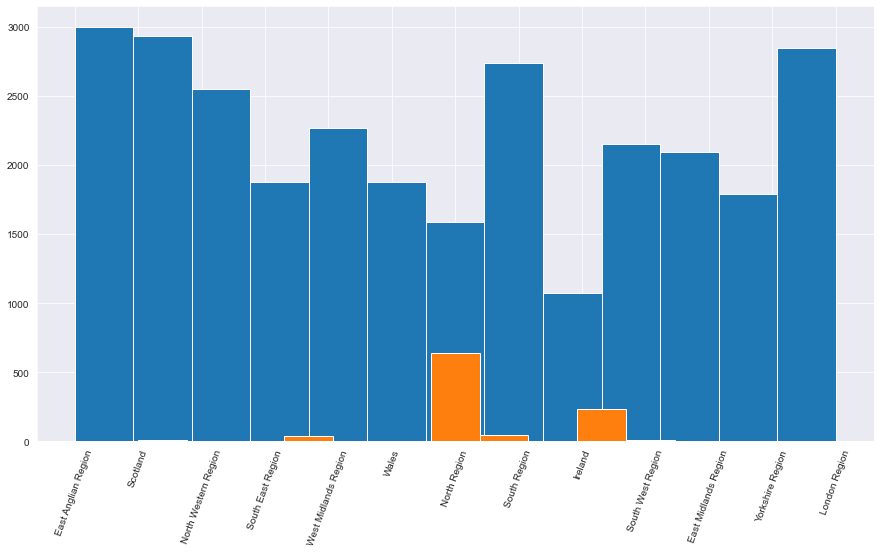

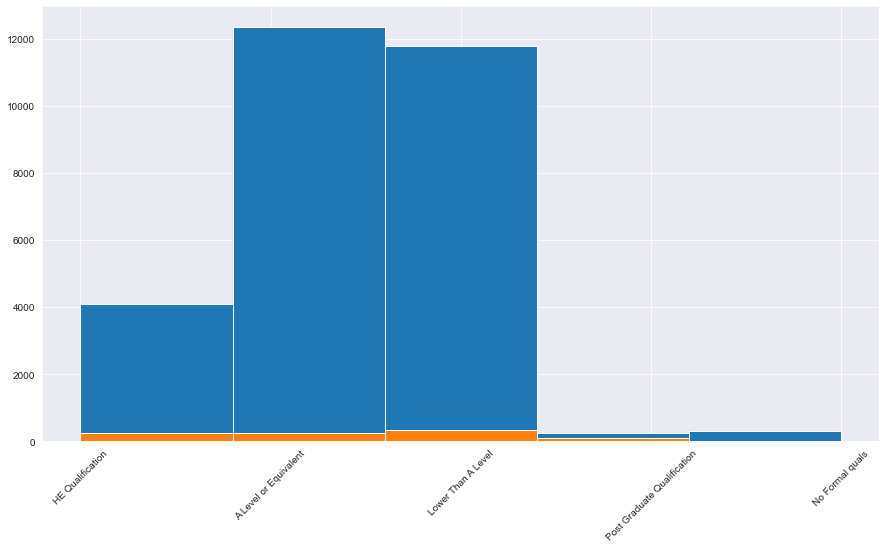

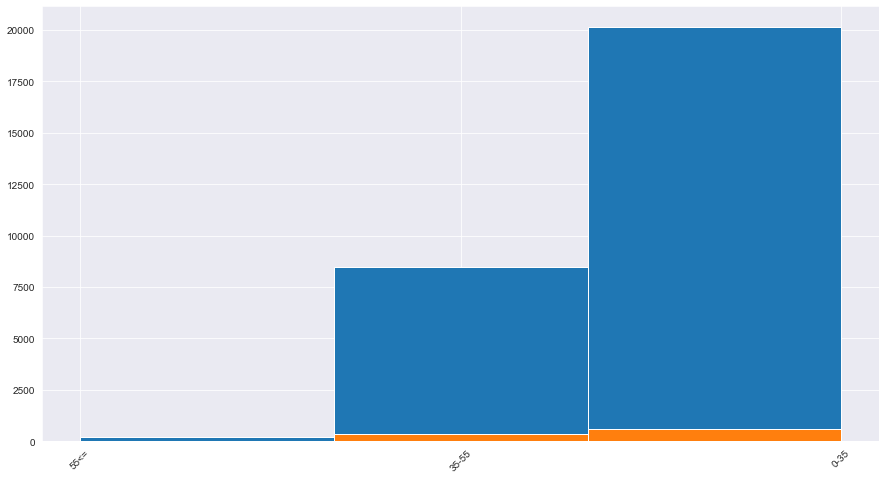

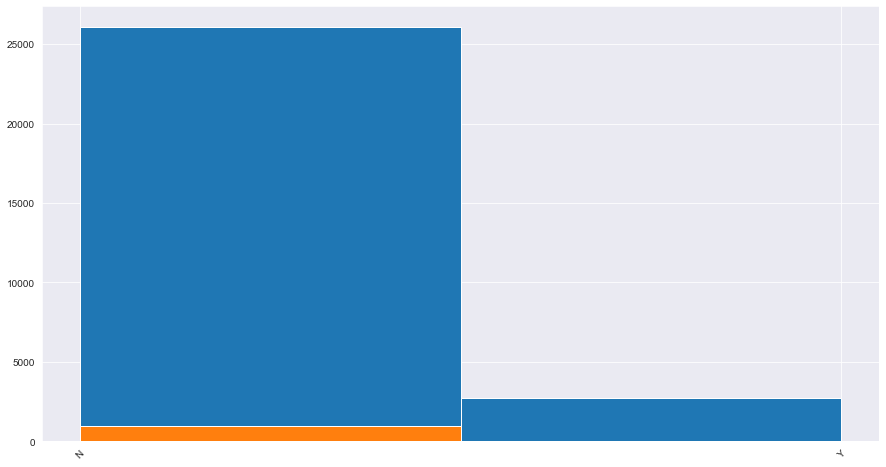

In [657]:
df_demographic.region.hist(figsize = [15,8], xrot = 70, bins = len(df_stud_info.region.unique()))
demo_null_info.region.hist(figsize = [15,8], xrot = 70, bins = len(df_stud_info.region.unique()))
plt.show()

df_demographic.highest_education.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.highest_education.unique()))
demo_null_info.highest_education.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.highest_education.unique()))
plt.show()

df_demographic.age_band.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.age_band.unique()))
demo_null_info.age_band.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.age_band.unique()))
plt.show()

df_demographic.disability.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.disability.unique()))
demo_null_info.disability.hist(figsize = [15,8], xrot = 45, bins = len(df_stud_info.disability.unique()))
plt.show()

# NO LUCK!

In [613]:
# TODO; get indices from duplicates in original dataframe and see if they all 
#.     exist in the new df_demographic dataframe

In [612]:
retry_nulls = df_stud_info[df_stud_info.num_of_prev_attempts > 0]
print('Null values from retries: ',retry_nulls.imd_band.isnull().sum())

Null values from retries:  121


##### Demographic Analysis --> 

/Users/Mo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


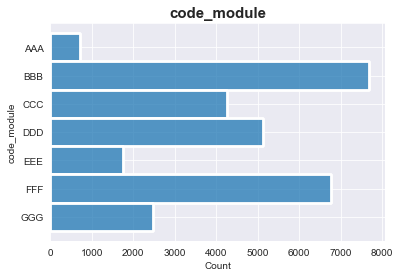

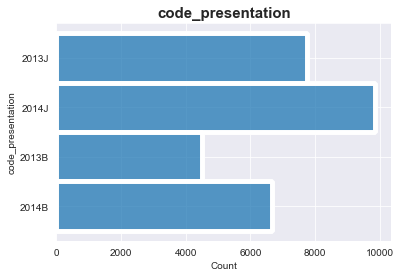

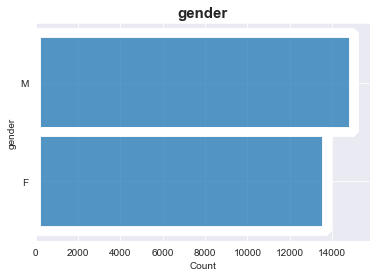

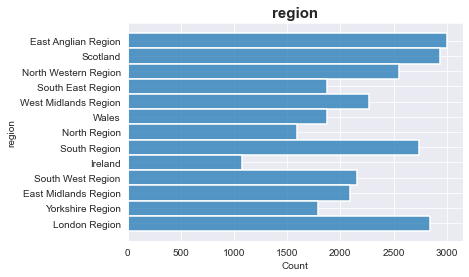

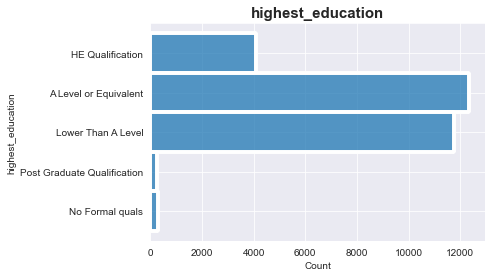

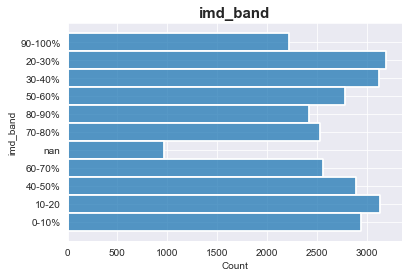

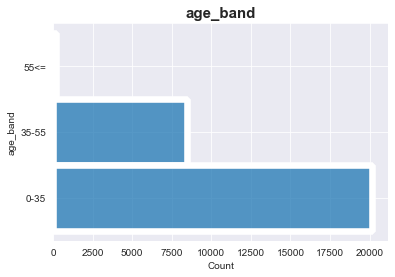

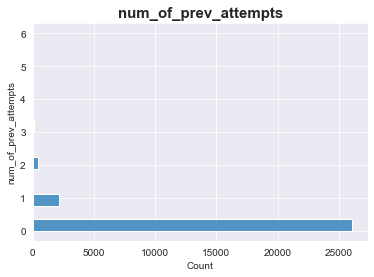

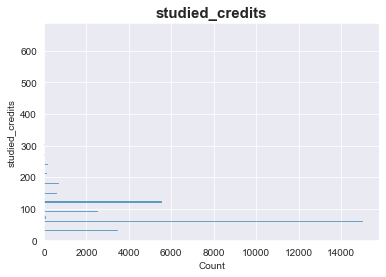

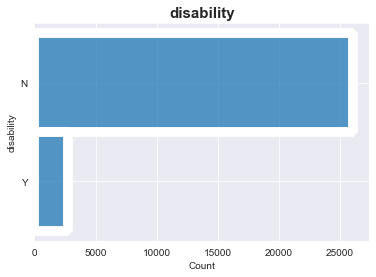

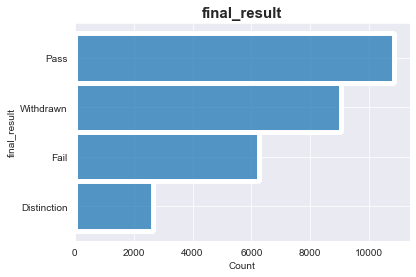

In [661]:
df_demographic.imd_band = df_demographic.imd_band.astype(str)

for column in df_demographic.columns:
    if column != 'id_student':
        sns.set_style('darkgrid')
        sns.histplot(df_demographic, y = column).set_title(column,fontdict= { 'fontsize': 15, 'fontweight':'bold'})
        plt.show()
    else:
        continue

In [662]:
final_df = df_demographic.copy()
df1 = df_demographic.loc[df_demographic.final_result.isin(['Pass','Distinction'])]
df2 = df_demographic[df_demographic.final_result.isin(['Withdrawn','Fail'])]

print('Passed or Distinction: ',df1.shape[0]/final_df.shape[0] * 100,'%')
print('Failed or Withdrawn: ',df2.shape[0]/final_df.shape[0] * 100,'%')

Passed or Distinction:  46.82299808928261 %
Failed or Withdrawn:  53.177001910717394 %


#### Raw Summary

- gender: Relatively equal representation
- region: Relatively high population across the board (kinda low: Wales,           Ireland, North/South/Yorkshire Regions)
- highest_education: Mostly A-Level or lower (A-level ~ AP classes)
- imd_band: Pretty good socioeconomic representation
- age_band: Mostly >= 35
- num_of_prev_attempts: Most peoples first attempt
- final_result: 47% passed and 53% failed or withdrew         

-----------------
- Cross referencing different features that might be correalated

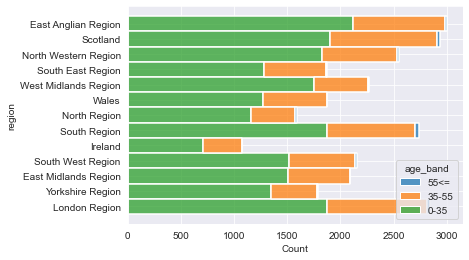

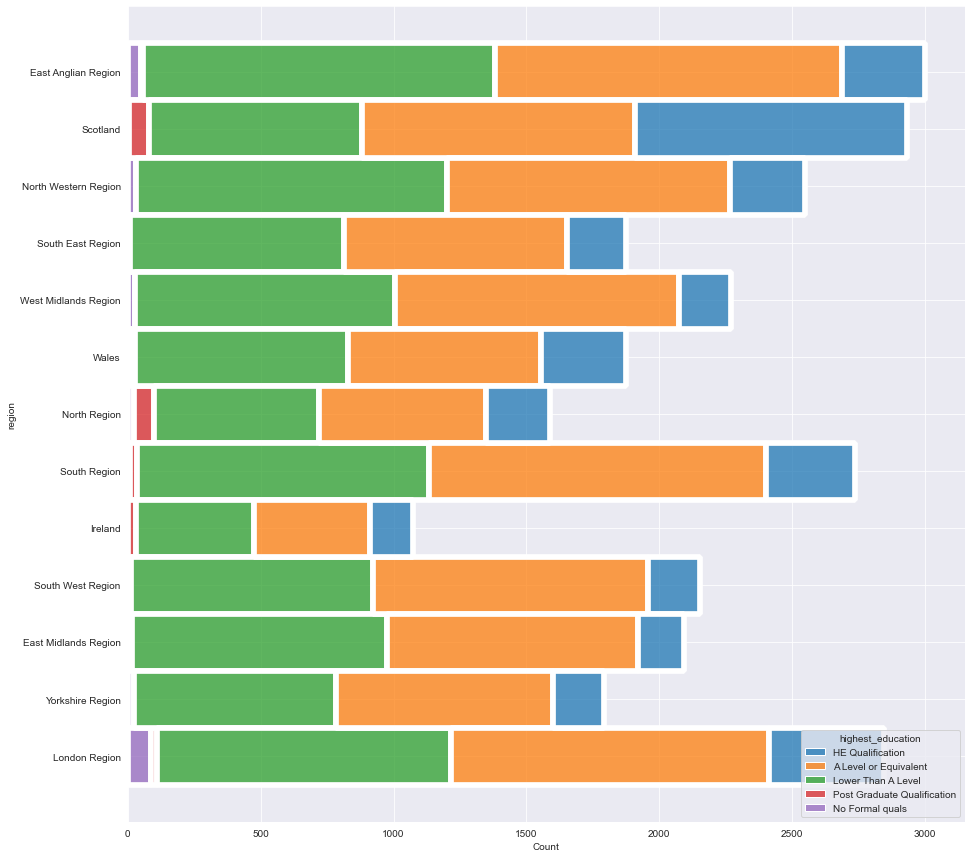

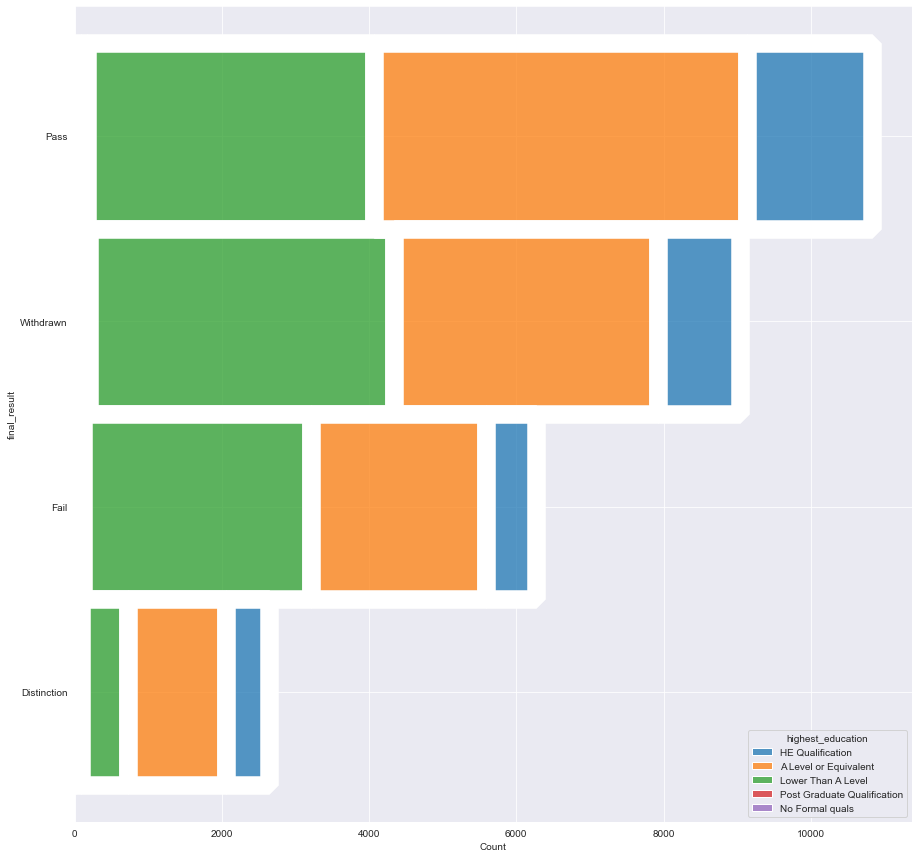

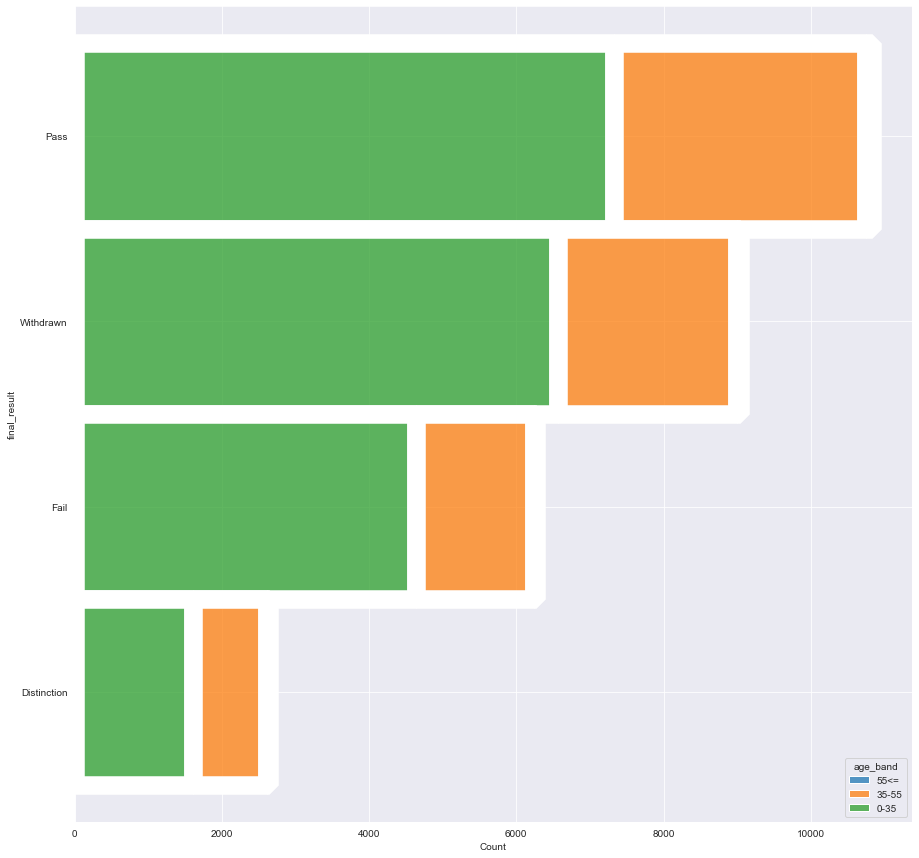

In [677]:
sns.histplot(df_demographic, y = 'region',hue = 'age_band', multiple = 'stack')
plt.show()

plt.figure(figsize = [15,15])
sns.histplot(df_demographic, y = 'region',hue = 'highest_education', multiple = 'stack')
plt.show()

plt.figure(figsize = [15,15])
sns.histplot(df_demographic, y = 'final_result',hue = 'highest_education', multiple = 'stack')
plt.show()

plt.figure(figsize = [15,15])
sns.histplot(df_demographic, y = 'final_result',hue = 'age_band', multiple = 'stack')
plt.show()


## Data Schema

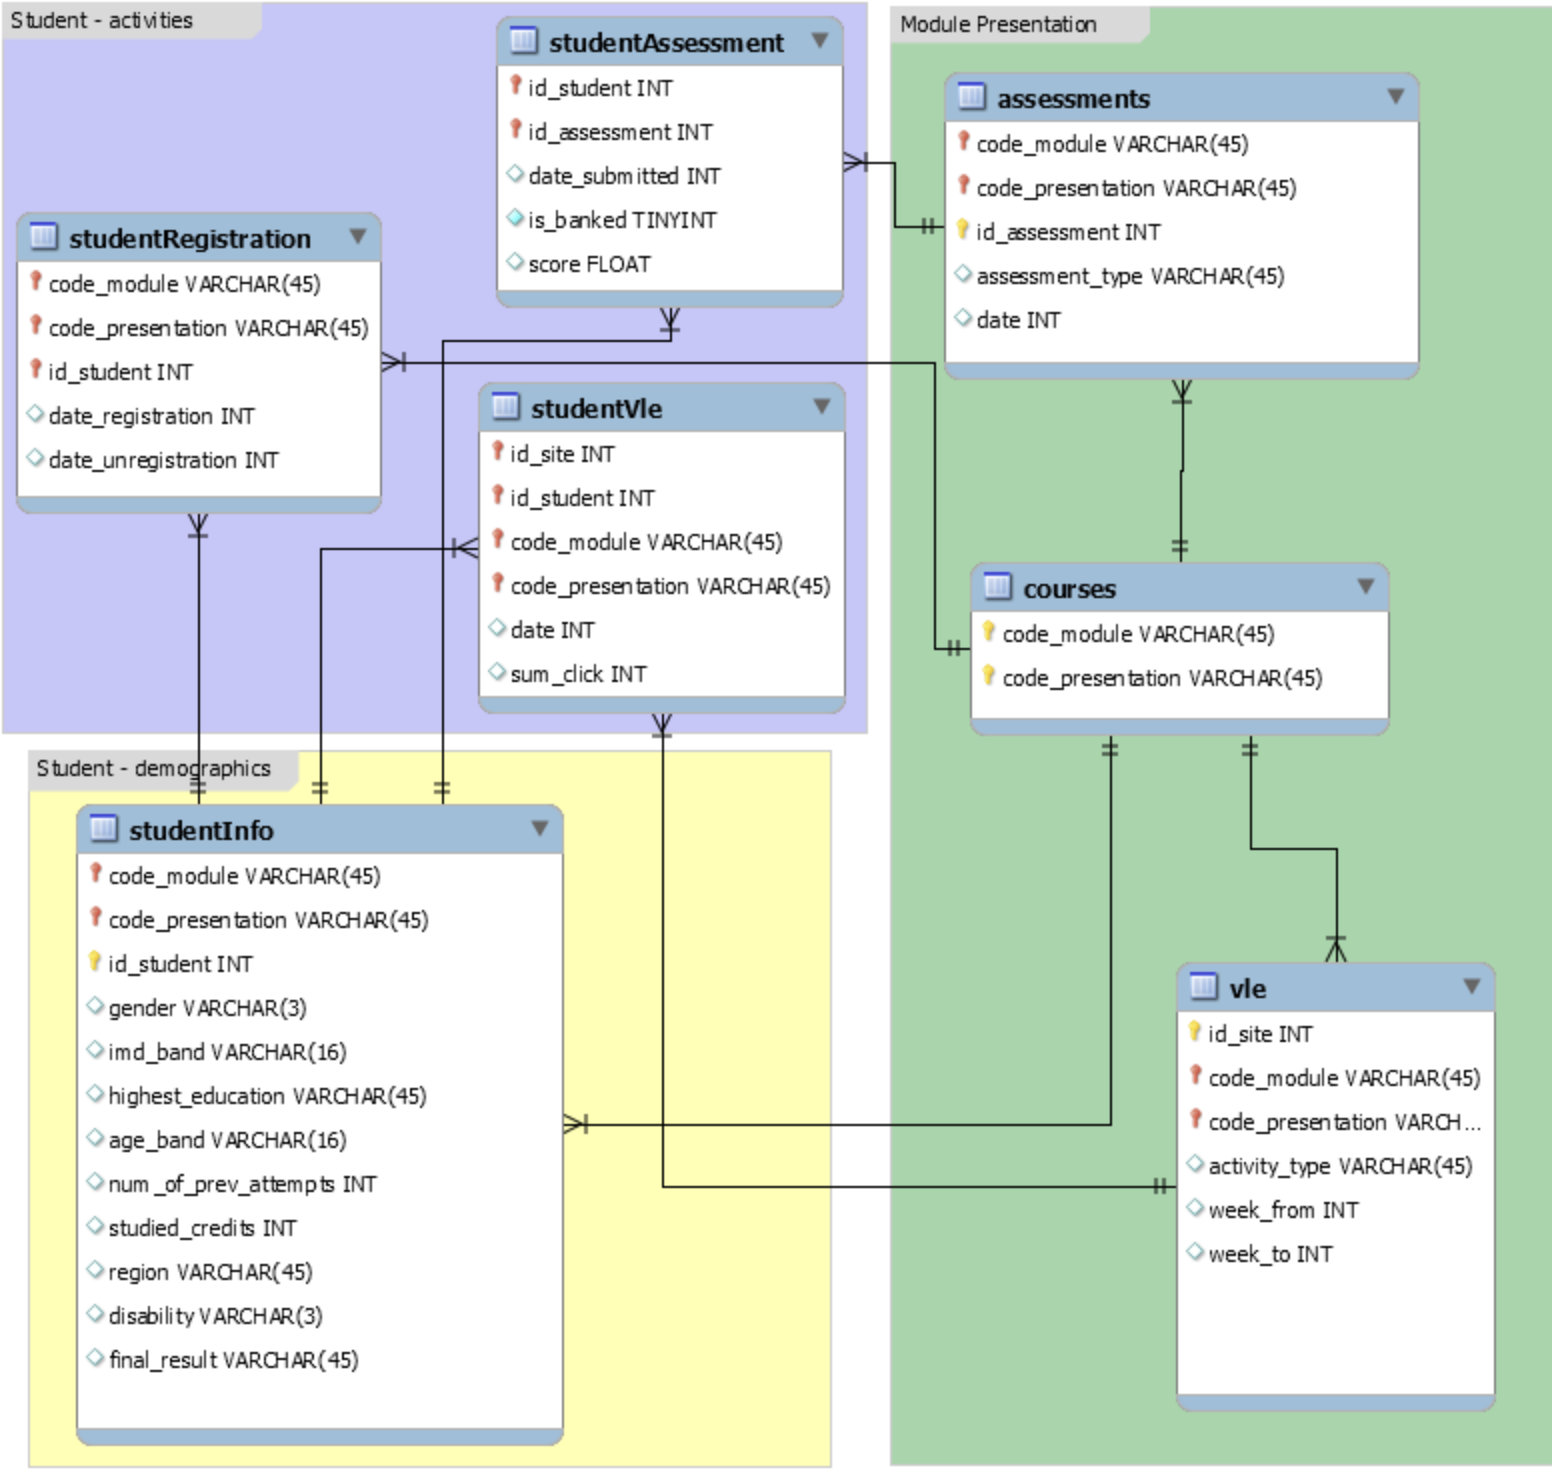

#### Client Facing

- Using this schema we can have many different ways to look at the data. Lets assume we have a client interested in using this data. A few questions that might be useful are:

1) What factors tend to have most of an impact on students scores?
    - Location?
    - Education?
    - Age?
    - Studied credits
    - Registration time?
    - Submission time?
2) What courses do students do best/worst in?
3) What kinds of assignments are most difficult for students
    - What are the behaviors that affect this?
    
3) What can students do to increase their chances of success in these courses?
    - Types of resources?

**Implementation**
- In order to answer these kinds of questions, we need to have different cuts of data that can be queried quickly whenever a new client question comes in or new data becomes available.
    - For this, since I have experience with mostly GCP so I would first write some code to build out the right data cuts needed to answer certain questions either on BigQuery or Python (then write to BQ/GCS, depending on the data size) transform and merge all of the features needed in a way that is not redundant.
    - After I have all of my data tables, depending on what the client question is I can pull the required data and use it to either do some classsification or prediction modeling
 


##### Layering Data

- There a plenty of things we can do to build onto this analysis and find a richer dataset that will make our models run better
    - Looking at external crime statistics in the UK
        - https://data.police.uk/data/
        - **merging on 'Region'**
    - Looking at Internet Access in different regions and for people with disabilities - https://www.ons.gov.uk/peoplepopulationandcommunity/householdcharacteristics/homeinternetandsocialmediausage/datasets/internetaccesshouseholdsandindividualsreferencetables
       - **merging on 'disability' AND/OR 'region'**
    - Looking at direct census data for different regions
        -https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationandhouseholdestimatesenglandandwalescensus2021
        - **merging on 'Region' AND/OR 'age_band'**
            - *Age feature might need some tweaking to match up w census format*
    - Looking at natural disasters in those year for different regions
        - https://en.wikipedia.org/wiki/List_of_natural_disasters_in_the_British_Isles
        


- All of this data can help us control for certain performance we might see for certain groups of students. Some of external factors like instances of natural disasters may be hard to quantify whenever we want to add weights to the data but we can build out an index for severity of natural disasters depending on how it might impact access to internet/electricity